In [110]:
%reload_ext version_information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import json

In [54]:
with ZipFile('foods-2011-10-03.json.zip', 'r') as zip:
    filename = str(zip.namelist()[0])
    file = zip.open(filename)
    jsonfile = json.load(file)

info = pd.DataFrame(jsonfile)
info = info.drop(["tags", "portions", "nutrients"], axis=1)
info

,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
6633,43408,"Babyfood, juice, pear",None,Baby Foods
6634,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods


In [77]:
nutrients = []
ids = []
for data in jsonfile: 
    df = pd.DataFrame(data['nutrients'])
    df['id'] = data['id']
    nutrients.append(df)

In [78]:
nutrients[0]

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
157,1.472,g,Serine,Amino Acids,1008
158,93.000,mg,Cholesterol,Other,1008
159,18.584,g,"Fatty acids, total saturated",Other,1008
160,8.275,g,"Fatty acids, total monounsaturated",Other,1008


In [79]:
nutrients = pd.concat(nutrients)
nutrients.shape

(389355, 5)

In [80]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [85]:
nutrients = nutrients.drop_duplicates()
nutrients.duplicated().any()

False

In [83]:
nutrients.isna().any()

value          False
units          False
description    False
group          False
id             False
dtype: bool

In [86]:
nutrients.shape

(375176, 5)

In [89]:
nutrients = nutrients.rename(columns={"description": "nut_description", "group": "nut_group"})
nutrients.head()

,value,units,nut_description,nut_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [90]:
merged = pd.merge(nutrients, info, on='id', how='outer')

In [91]:
merged

,value,units,nut_description,nut_group,id,description,manufacturer,group
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",,Dairy and Egg Products
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",,Dairy and Egg Products
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",,Dairy and Egg Products
3,3.280,g,Ash,Other,1008,"Cheese, caraway",,Dairy and Egg Products
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",,Dairy and Egg Products
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",None,Baby Foods
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",None,Baby Foods
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",None,Baby Foods
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",None,Baby Foods


In [98]:
zink = merged['nut_description'] == 'Zinc, Zn'
zink = merged[zink]

In [102]:
zink.head()

,value,units,nut_description,nut_group,id,description,manufacturer,group
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",,Dairy and Egg Products
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",,Dairy and Egg Products
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",,Dairy and Egg Products
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",,Dairy and Egg Products
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products


In [103]:
zink['value'].describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

In [105]:
edam = zink['description'] == 'Cheese, edam'
edam = zink[edam]
edam

# überdurchschnittlicher Zinkgehalt

# 75% der Produkte haben einen Zinkgehalt unter 2.98 mg 
#--> mehr als 75% der Lebensmittel haben einen geringeren Zinkgehalt als Edamer

,value,units,nut_description,nut_group,id,description,manufacturer,group
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",,Dairy and Egg Products


In [107]:
# Maximum Zink-Gehalt
maxzinc = zink['value'] == zink['value'].max()
maxzinc = zink[maxzinc]
maxzinc['description']

333726    Mollusks, oyster, eastern, canned
Name: description, dtype: object

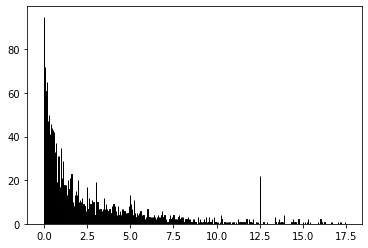

In [150]:
xmin = -0.1
xmax = 17.5
n, bins, _ = plt.hist(zink['value'], edgecolor='black', bins=1750, range = [xmin, xmax])

In [145]:
bins[0:3]

array([-1.00000000e-02,  5.71428571e-06,  1.00114286e-02])

In [133]:
zink['value'].value_counts()

0.00     95
0.07     72
0.20     65
0.04     62
0.01     61
         ..
13.40     1
4.54      1
3.18      1
9.82      1
8.73      1
Name: value, Length: 894, dtype: int64

In [151]:
%version_information numpy , pandas

Software versions
Python 3.6.8 64bit [GCC 8.3.0]
IPython 7.8.0
OS Linux 5.0.0 31 generic x86_64 with Ubuntu 18.04 bionic
numpy 1.17.2
pandas 0.25.1
Fri Oct 11 15:31:30 2019 CEST